<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/Examenes/Pradigmas_Parcial_2_E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equipo 4:

Fragoso Alvarado Daniel

Rangel Rámirez Hugo

Gómez Martinez Jesús Enrique

1. Dentro del paquete sklearn.datasets existe la función generadora load_digits (https://bit.ly/3CGbGyj). Escribe un código que realice las siguientes actividades: $(30 p)$

(a) Cargue el conjunto para poder utilizar modelos de aprendizaje.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()

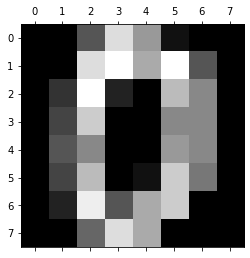

In [ ]:
plt.matshow(digits.images[0])
plt.gray()
plt.show()

Vamos a obtener los indicadores de los datos:

In [ ]:
# Datos de cada digito
data = digits.data

# Número de digitos:
n_digits = len(np.unique(digits.target))
# Las clasificaciones
labels = digits.target

# Vamos a normalizar nuestros datos:
from sklearn.preprocessing import normalize
data = normalize(data)


(b) Aplique los modelos agrupamiento:

Notemos que los algoritmos que nos piden obtener, se tratan de algoritmos no supervisados, por lo que haremos la predicción sobre 

  1. K-medias


In [ ]:
# Importamos K medias:

from sklearn.cluster import KMeans

km = KMeans(n_clusters = n_digits)
km = km.fit(data)
y_hat_k = km.predict(data)

In [ ]:
# Vamos a calcular la precisión del modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy : ', accuracy_score(labels, y_hat_k))

Accuracy :  0.03728436282693378


  2. Aglomerativo

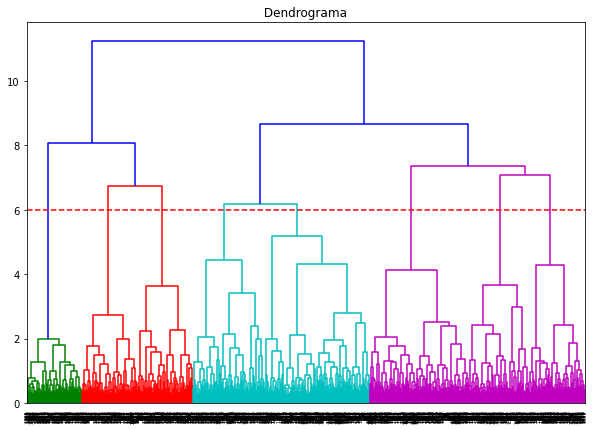

In [ ]:
# Vamos a generar en dendrograma, para ver los clusters ideales, aunque previamente 
# sabemos deben de ser 10 digitos

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10 , 7))
plt.title(" Dendrograma ")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

plt.axhline(y = 6, color = 'r', linestyle = '--')

El Dendrograma nos india que la cantidad adecuada de clusters, son 8, es una cantidad adecuada, por lo que esperariamos que el algoritmo clasificará correctamente nuestros digitos con 10:

In [ ]:
from sklearn . cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = n_digits, affinity = 'euclidean', linkage = 'ward')

y_hat_a = cluster.fit_predict(data)

In [ ]:
print('Accuracy : ', accuracy_score(labels, y_hat_a))

Accuracy :  0.19476905954368393


  3. Mezclas Gaussianas



In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= n_digits)
gmm = gmm.fit(data)

y_hat_g = gmm.predict(data)

In [ ]:
print('Accuracy : ', accuracy_score(labels, y_hat_g))

Accuracy :  0.2648859209794101


(c) Evalúe las metricas de evaluación de los resultados para cada modelo.

Como vimos, a cada modelo le calculamos su precisión, y esta es muy baja, esto no quiere decir necesariamente que nuestro modelo haya clasificado de forma errónea, sino que el calculo del Accuracy, dependemos de que las etiquetas que asigno el algoritmo coincidan con las etiquetas de nuestros datos lo que no ocurre, a eso le podemos atribuir el bajo valor registrado.

Buscando en la biblioteca de Sklearn, encontramos el índicador `.rand_score`; el cual calcula una medida de similitud entre dos agrupamientos considerando todos los pares de muestras y contando los pares que se asignan en el mismo grupo o en grupos diferentes en los agrupamientos predichos y verdaderos. Este indicador nos podría dar un valor mucho más preciso sobre la forma de clasificar de nuestros algoritmos.

In [ ]:
from sklearn.metrics.cluster import rand_score

print('Rand K-Medias : ', rand_score(labels, y_hat_k))
print('Rand Aglomeración : ', rand_score(labels, y_hat_a))
print('Rand Gauss : ', rand_score(labels, y_hat_g))


Rand K-Medias :  0.9376416769845313
Rand Aglomeración :  0.94414843843922
Rand Gauss :  0.936518176173355


----

2. Demuestra que si $0<\alpha<1$, entonces $\sum_{i=1}^{\infty} \alpha(1-\alpha)^{i-1}=1$.


Como $0<α<1 \implies 0>-α>-1 \implies 1>1-α>0$. Entonces:

\begin{align}
\sum_{i=1}^{\infty}α(1-α)^{i-1} &= \frac{α}{1-α}\sum_{i=1}^{\infty}(1-α)^{i} \\
  &= \frac{α}{1-α}\left(\frac{1-α}{1-(1-α)}\right) \\
  &= \frac{α}{1-α}\left(\frac{1-α}{α}\right) \\
  &= 1
\end{align}

La segunda igualdad se da porque $1>1-α>0$, y por la fórmula de la serie geométrica que dice que para $0<r<1$ se tiene que $\sum_{i=1}^{\infty}r^i = \frac{r}{1-r}$

---

3. Dentro del paquete sklearn.datasets existe la función generadora make_multilabel_classification (https://bit.ly/34Xr8Ib). Escribe un código que realice las siguientes actividades:
$(20 p)$

(a) Genere un conjunto de datos con al menos un valor de 5 en el parámetro $n_{-}$features, al menos 3 para $n_{-}$classes y $n_{-}$labels $=1$


In [ ]:
# Importmos bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_multilabel_classification
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_multilabel_classification(n_features=5, n_classes=3, n_labels=1)

(b) Haga una gráfica con 3 de las características para observar el conjunto generado

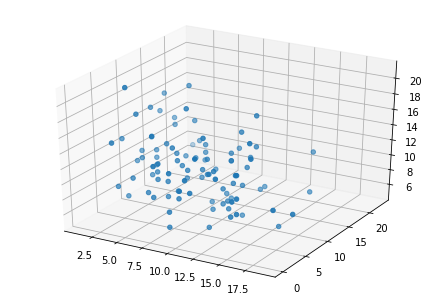

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2])

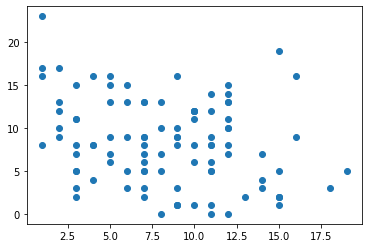

In [ ]:
# Vamos a visualizar por planos

plt.scatter(X[:,0], X[:,1])

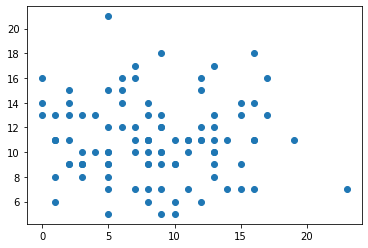

In [ ]:
plt.scatter(X[:,1], X[:,2])

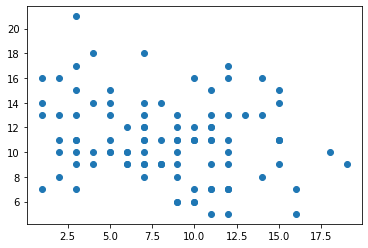

In [ ]:
plt.scatter(X[:,0], X[:,2])

(c) Cree conjuntos de entrenamiento y prueba a partir del conjunto generado


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print('Completo: ', X.shape[0])
print('Entrenamiento: ', X_train.shape[0])
print('Prueba: ', X_test.shape[0])

Completo:  100
Entrenamiento:  75
Prueba:  25


(d) Entrene un modelo $k$-vecinos con al menos 5 valores diferentes para $k$ y muestre las metricas de evaluación de cada uno

In [ ]:
# Vamos a reescalar los datos paar evitar una mala clasificación
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Importamos el algortimo de k vecinos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


for i in range(2,10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('con k = {:.2f} '.format(i))
    print('Accuracy : ', accuracy_score(y_test, y_pred))
    

con k = 2.00 
Accuracy :  0.76
con k = 3.00 
Accuracy :  0.8
con k = 4.00 
Accuracy :  0.72
con k = 5.00 
Accuracy :  0.76
con k = 6.00 
Accuracy :  0.76
con k = 7.00 
Accuracy :  0.72
con k = 8.00 
Accuracy :  0.68
con k = 9.00 
Accuracy :  0.64


In [ ]:
# Vamos a observar el resto de las métricas:

for i in range(2,7):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('con k = {:.2f} '.format(i))
    print('Precision : ', precision_score(y_test, y_pred, average='micro'))
    print('Recall : ', recall_score(y_test, y_pred, average='micro'))
    print('F1 : ', f1_score(y_test, y_pred, average='micro'))

con k = 2.00 
Precision :  1.0
Recall :  0.625
F1 :  0.7692307692307693
con k = 3.00 
Precision :  0.9411764705882353
Recall :  0.6666666666666666
F1 :  0.7804878048780487
con k = 4.00 
Precision :  0.9333333333333333
Recall :  0.5833333333333334
F1 :  0.7179487179487181
con k = 5.00 
Precision :  0.9375
Recall :  0.625
F1 :  0.75
con k = 6.00 
Precision :  1.0
Recall :  0.625
F1 :  0.7692307692307693


---

4. Dentro del paquete sklearn.datasets existe la función fetch_20newsgroups (https://bit.ly/3aSE6L5), que sirve para descargar el conjunto de datos llamado Twenty Newsgroups, el cual consiste de aproximadamente 20,000 documentos de noticias, particionadas en 20 grupos. La descripción detallada de los grupos se encuentra en https://bit.ly/37Xu2yH.
Escribe un código que realice las siguientes actividades:
$(20 p)$

(a) Elige al menos 5 categorías y se descarga solamente las que seleccionaste del conjunto de entrenamiento (la función permite hacer esto)

(b) Aplique $B o W$ a los datos con ayuda de CountVectorizer

(c) Obtenga las frecuencias con ayuda de TfidfTransformer con el valor use_idf=False

(d) Aplique el clasificador bayesiano multinomial MultinomialNB

(e) Calcule las metricas de evaluación del modelo

Se eligieron las catecorias de: 
* comp.graphics
* rec.sport.baseball
* sci.med
* talk.politics.guns
* soc.religion.christian

A través del parámetro `subset` se indicó que sólo descargara el conjunto de entrenamiento y a través del parámetro `return_X_y` la función únicamnete devuelve los documentos en $X$ y el etiquetado en $y$.



In [ ]:
from sklearn.datasets import fetch_20newsgroups

categorias = ['comp.graphics', 'rec.sport.baseball','sci.med','talk.politics.guns','soc.religion.christian']

X_train, y_train = fetch_20newsgroups(categories=categorias, subset='train', return_X_y=True)

A continuación se aplica $BoW$ a través de $CountVectorizer$ a X_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)

Después se aplica TfidfTransformer con el argumento `use_idf=False`

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=False)
training_data = tfidf.fit_transform(training_data)

Finalmente se aplica el clasificador bayesiano $MultinomialNB$

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data , y_train)

MultinomialNB()

Para calcular las métricas que evaluan el modelo, se descargó el conjunto de prueba, ahora con el parámetro `subset='test'`, usando la función `fetch_20newsgroups()`. Se aplicaron los modelos previamente entrenados y se calcularó accuracy, presición, recall y F1, los últimos 3 en su versión macro, pues era necesario usar ya sea macro o micro porque son datos con múltiples etiquetas.

In [ ]:
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score

X_test, y_test = fetch_20newsgroups(categories=categorias, subset='test', return_X_y=True)
testing_data = count_vector.transform(X_test)
testing_data = tfidf.transform(testing_data)
predictions = naive_bayes.predict(testing_data)

print('Accuracy: %.3f ' % accuracy_score(y_test , predictions))
print('Precisión (macro): %.3f ' % precision_score(y_test, predictions, average='macro'))
print('Recall (macro): %.3f ' % recall_score(y_test, predictions, average='macro'))
print('F1 (macro): %.3f ' % f1_score(y_test, predictions, average='macro'))


Accuracy: 0.891 
Precisión (macro): 0.906 
Recall (macro): 0.891 
F1 (macro): 0.894 


----

7. Elige alguno de los modelos usados en los puntos previos y crea una pipeline que realice los pasos necesarios para replicar los resultados obtenidos; para la evaluación, con la metrica de exactitud es suficiente $\quad(10 p)$

A continuación se muestra cómo los incisos b), c) y d) pueden ser ejecutados al mismo tiempo haciendo uso de un `pipeline`. Se crea el pipe con los 3 modelos a usar, se entrena con X_train y y_train, se hace la predicción sobre X_test y fincalmente para corroborar que se obtuvieron los mismos resultados se obtienen las mismas métricas usadas para evaluar el modelo, obteniendo los mismos resultados.

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(CountVectorizer(), TfidfTransformer(use_idf=False), MultinomialNB())
pipe.fit(X_train, y_train)
predictions_pipe = pipe.predict(X_test)
print('Accuracy: %.3f ' % accuracy_score(y_test , predictions_pipe))
print('Precisión (macro): %.3f ' % precision_score(y_test, predictions_pipe, average='macro'))
print('Recall (macro): %.3f ' % recall_score(y_test, predictions_pipe, average='macro'))
print('F1 (macro): %.3f ' % f1_score(y_test, predictions_pipe, average='macro'))


Accuracy: 0.891 
Precisión (macro): 0.906 
Recall (macro): 0.891 
F1 (macro): 0.894 


----

5. Demuestra que a partir de $\widehat{\mu}_{n}=\sum_{t=1}^{n} w_{t} y_{t}$ se obtiene $\widehat{\mu}_{n}=(1-\alpha) \widehat{\mu}_{n-1}+\alpha y_{n}$.

El estimador de media con pesos exponenciales de $E\left(Y_{n} \mid y_{1}, \ldots, y_{n}\right)$ es:
$$
\widehat{\mu}_{n}=\sum_{t=1}^{n} w_{t} y_{t}
$$
donde $0 \leq w_{t} \leq 1$ y $\sum_{t=1}^{n} w_{t}=1 ;$ los pesos se definen de acuerdo con:

$$
w_{t}=\alpha(1-\alpha)^{n-t}, t \in\{1, \ldots, n\}
$$

como $0<\alpha<1$, los pesos tienden a $\alpha$ conforme $t$ incrementa su valor de 1 a $n$.

Entonces, vamos a sustituir el valor de $w_i$, en $\widehat{\mu}_{n}$:

$$
\widehat{\mu}_{n}=\sum_{t=1}^{n} w_{t} y_{t} = \sum_{t=1}^{n} \alpha(1-\alpha)^{n-t} y_t
$$

Vamos a generar una división de la suma#

$$
\widehat{\mu}_{n}= \sum_{t=1}^{n} \alpha(1-\alpha)^{n-t} y_t = \sum_{t=0}^{n-1} \alpha(1-\alpha)^{n-t} y_t + \alpha(1-\alpha)^{n-n} y_n = \sum_{t=0}^{n-1} \alpha(1-\alpha)^{n-t} y_t + \alpha y_n
$$


Notemos que:

$$
\sum_{t=0}^{n-1} w_{t} y_{t}  = \alpha(1-\alpha) y_{n-1}+\alpha(1-\alpha)^{2} y_{n-2}+\cdots = (1-\alpha)\left(\alpha y_{n-1}+\alpha(1-\alpha) y_{n-2}+\cdots\right)
$$

Y 

$$\widehat{\mu}_{n-1}=\sum_{t=1}^{n-1} w_{t} y_{t} = \alpha y_{n-1}+\alpha(1-\alpha) y_{n-2}+\cdots$$

Sustituyendo:

$$
\widehat{\mu}_{n} = (1-\alpha) \widehat{\mu}_{n-1} + \alpha y_n
$$

-----

6. En el sitio web: https://datos.covid-19.conacyt.mx/#DownZCSV se encuentran disponibles los datos diarios sobre COVID19 en México por estado/municipio y por tipo de casos. Escribe un código que realice lo siguiente: $\quad(20 p)$

(a) Descarga al menos dos de los conjuntos y elige un estado/municipio; para cada uno de los seleccionados:

(b) Aplica el procesamiento necesario para tener esos datos listos para usarse como serie de tiempo (cuidado con las fechas; esta parte puede hacerse fuera del código, pero deberás adjuntar el archivo usado al final)

(c) Obtén la gráfica de autocorrelación y describe lo que observas.

(d) Utiliza un método de suavizado exponencial a la serie de datos y muestra gráficamente el resultado

(e) Utiliza regresión lineal con un retraso que elijas y muestra también el resultado del modelo

(f) Según la Secretaría de Salud del País, los datos son confiables a partir de dos semanas previas a la fecha actual; realiza predicciones y compara con los valores del conjunto de datos para:
1. 8 días previos
2. 15 días previos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Para Estados#

**b)Aplica el procesamiento necesario para tener esos datos listos para usarse como serie de tiempo (cuidado con las fechas; esta parte puede hacerse fuera del código, pero deberás adjuntar el archivo usado al final)**

In [ ]:
edo=pd.read_csv('Estados.csv')
SLP=edo.iloc[23:24]
SLP=SLP.transpose()
SLP=SLP.drop(['cve_ent','poblacion','nombre'],axis=0)
SLP=SLP.reset_index()
SLP.columns=['fecha','casos']
SLP.set_index('fecha',inplace=True)

In [ ]:
SLP.to_csv('SLP.csv')

In [ ]:
SLP=pd.read_csv('SLP.csv', index_col=['fecha'], parse_dates=['fecha'])

**c)  Obtén la gráfica de autocorrelación y describe lo que observas.**

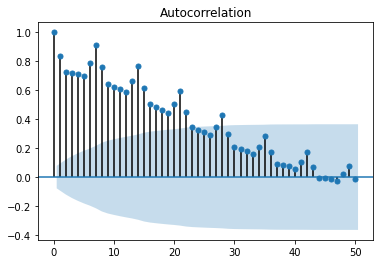

In [ ]:
sm.graphics.tsa.plot_acf(SLP.casos.values, lags=50)
plt.show()

Antes de 20 tenemos valores confiables

**d)Utiliza un método de suavizado exponencial a la serie de datos y muestra gráficamente el resultado**

In [ ]:
def pesos_MA(series, pesos):
  result=0.0
  pesos.reverse()
  for n in range(len(pesos)):
    result+=series.iloc[-n-1]*pesos[n]
  return float(result)

def exponential_smoothing(series, alpha ):
  """ series - conjunto de datos con tiempos
      alpha - parámetro de suavizado """
  result = [series[0]] # el primer valor es el mismo de la serie
  for n in range (1 , len(series)):
    result.append(alpha*series[n] +(1-alpha )*result[n -1])
  return result

def plotExponentialSmoothing(series , alphas ):
  """ Muestra el suavizado exponencial para varios valores de alpha
      series - serie de datos con tiempos
      alphas - lista de valores del parámetro """
  with plt.style.context('seaborn-white'):
    plt.figure(figsize =(15 , 7))
    for alpha in alphas :
      plt.plot(exponential_smoothing(series, alpha), label ="Alpha {}".format(alpha))
    plt.plot(series.values,"c", label="Real")
    plt.legend(loc ="best")
    plt.axis('tight')
    plt.title("Suavizado")
    plt.grid( True );

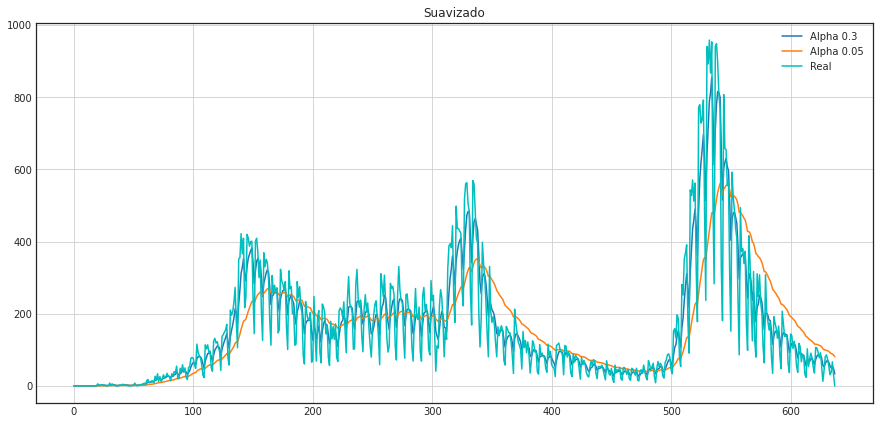

In [ ]:
plotExponentialSmoothing(SLP.casos, [0.3,0.05])

**e)  Utiliza regresión lineal con un retraso que elijas y muestra también el resultado del modelo**

In [ ]:
lineal= pd.DataFrame(SLP.casos.copy())
lineal.columns=['fecha']

In [ ]:
for i in range (6 , 25):
  lineal["lag_ {}".format(i)] = lineal.fecha.shift(i)

In [ ]:
def timeseries_train_test_split(X , y , test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train , X_test , y_train , y_test

In [ ]:
y = lineal.dropna().fecha
X = lineal.dropna().drop(['fecha'], axis =1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X , y ,test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train ,y_train )

LinearRegression()

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
def plotModelResults(model , X_train , X_test , y_train , y_test ,plot_intervals = False , plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize =(15 , 7))
  plt.plot(prediction , "g" , label ="predicción", linewidth =2.0)
  plt.plot(y_test.values , label ="real", linewidth =2.0)
  # intervalos & anomalías
  if plot_intervals:
    # Aquí usamos cross_val_score
    cv = cross_val_score(model , X_train , y_train , cv =tscv, scoring ="neg_mean_absolute_error")
  error = mean_absolute_percentage_error(prediction , y_test )
  plt.title("Error absoluto promedio {0:.2f} %".format(error))
  plt.legend(loc ="best")
  plt.tight_layout()
  plt.grid(True);

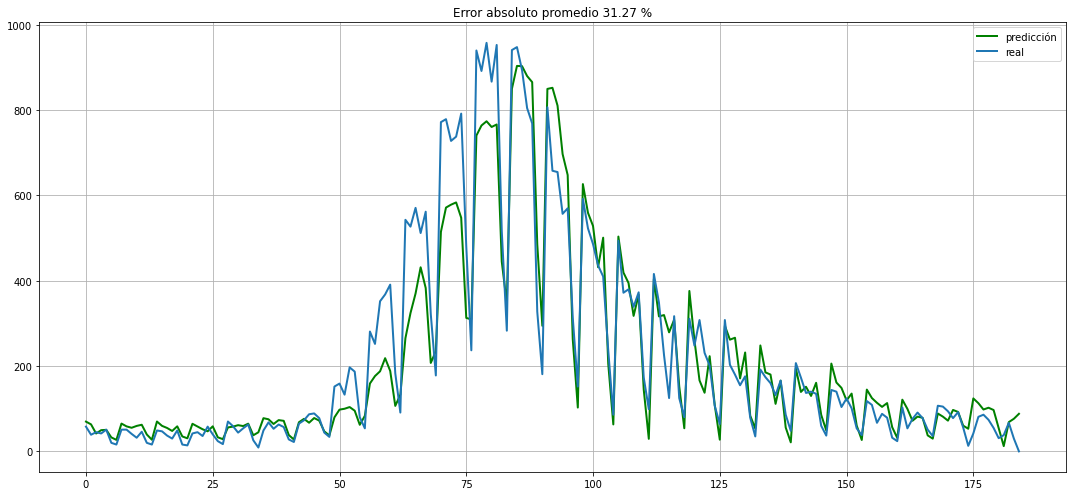

In [ ]:
plotModelResults(lr , X_train , X_test , y_train , y_test , plot_intervals = True )

**f) Según la Secretaría de Salud del País, los datos son confiables a partir de dos semanas previas a la fecha actual; realiza predicciones y compara con los valores del conjunto de datos para:**
 
**i. 8 días previos**

**ii. 15 días previos**

In [ ]:
train=SLP[0:630]
test=SLP[630:]
train.head(2)

,casos
fecha,
2020-02-26,0
2020-02-27,0


In [ ]:
y_hat_avg=test.copy()
fitl=ExponentialSmoothing(np.array(train['casos']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['Holt-Winter']=fitl.forecast(len(test))

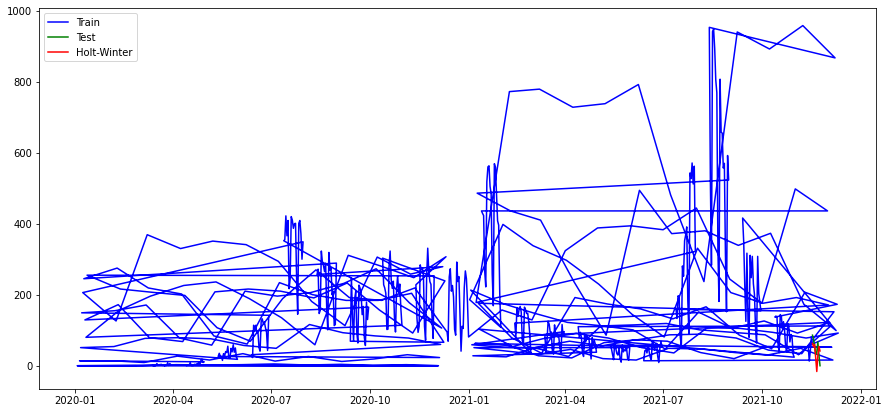

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train['casos'],color='blue', label='Train')
plt.plot(test['casos'],color='green',label='Test')
plt.plot(y_hat_avg['Holt-Winter'], color='red', label='Holt-Winter')
plt.legend(loc='best')
plt.show()

**ii. 15 días previos**

In [ ]:
train2=SLP[0:622]
test2=SLP[622:]

In [ ]:
y_hat_avg2=test2.copy()
fitl2=ExponentialSmoothing(np.array(train['casos']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg2['Holt-Winter']=fitl2.forecast(len(test2))
y_hat_avg2.head()

,casos,Holt-Winter
fecha,,
2021-09-11,105,62.891165
2021-10-11,94,53.010617
2021-11-11,78,59.801220
2021-12-11,92,21.117872
2021-11-13,56,-16.287311


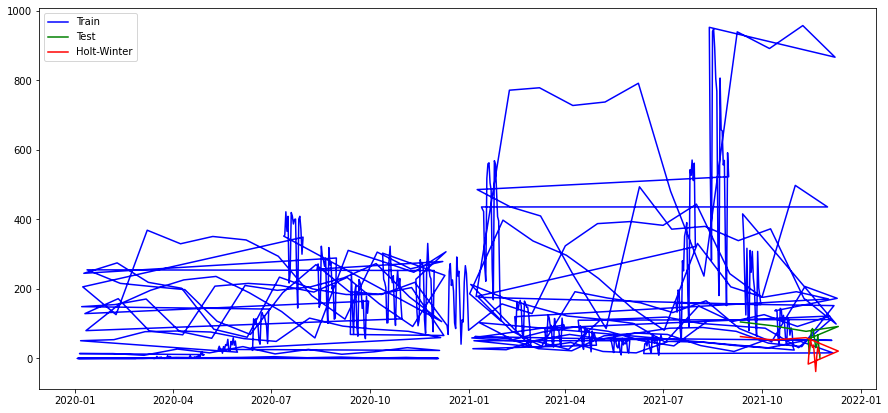

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train2['casos'],color='blue', label='Train')
plt.plot(test2['casos'],color='green',label='Test')
plt.plot(y_hat_avg2['Holt-Winter'], color='red', label='Holt-Winter')
plt.legend(loc='best')
plt.show()

#Para Municipios#

In [ ]:
mun=pd.read_csv('Municipios.csv')
PUE=mun.iloc[1930:1931]
PUE=PUE.transpose()
PUE=PUE.drop(['cve_ent','poblacion','nombre'],axis=0)
PUE=PUE.reset_index()
PUE.columns=['fecha','casos']
PUE.set_index('fecha',inplace=True)

In [ ]:
PUE.to_csv('PUE.csv')

In [ ]:
PUE=pd.read_csv('PUE.csv', index_col=['fecha'], parse_dates=['fecha'])

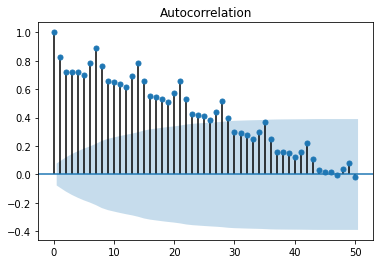

In [ ]:
sm.graphics.tsa.plot_acf(PUE.casos.values, lags=50)
plt.show()

Nuevamente parece que antes de son buenos valores para tomar en cuenta

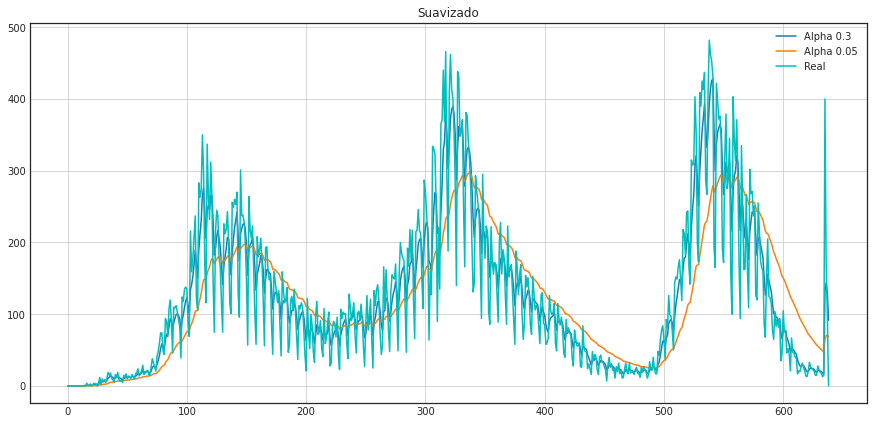

In [ ]:
plotExponentialSmoothing(PUE.casos, [0.3,0.05])

In [ ]:
lineal2= pd.DataFrame(PUE.casos.copy())
lineal2.columns=['fecha']

In [ ]:
for i in range (6 , 25):
  lineal2["lag_ {}".format(i)] = lineal2.fecha.shift(i)

In [ ]:
y = lineal2.dropna().fecha
X = lineal2.dropna().drop(['fecha'], axis =1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X , y ,test_size =0.3)

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train ,y_train )

LinearRegression()

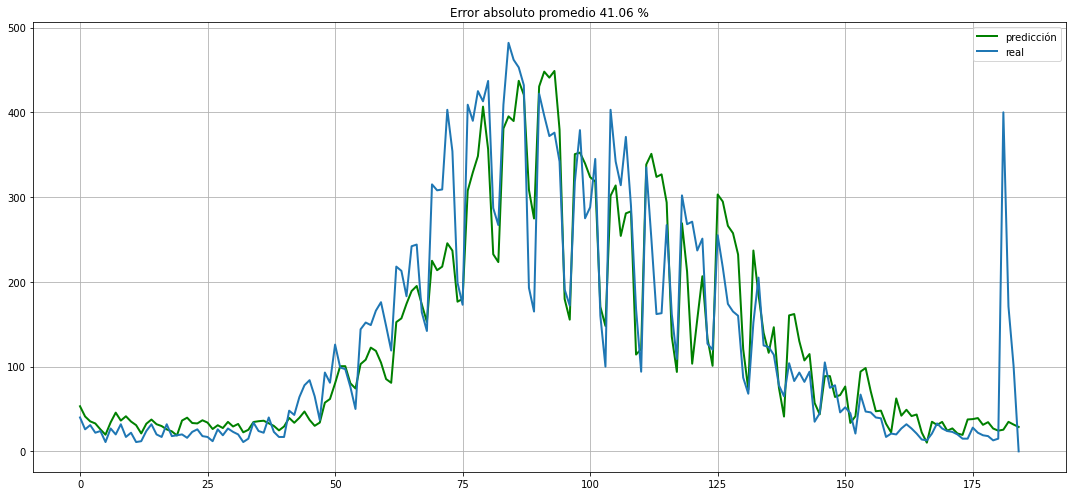

In [ ]:
plotModelResults(lr2 , X_train , X_test , y_train , y_test , plot_intervals = True )

In [ ]:
train3=PUE[0:630]
test3=PUE[630:]

In [ ]:
y_hat_avg3=test3.copy()
fitl3=ExponentialSmoothing(np.array(train['casos']), seasonal_periods=15, trend='add', seasonal='add').fit()
y_hat_avg3['Holt-Winter']=fitl3.forecast(len(test3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


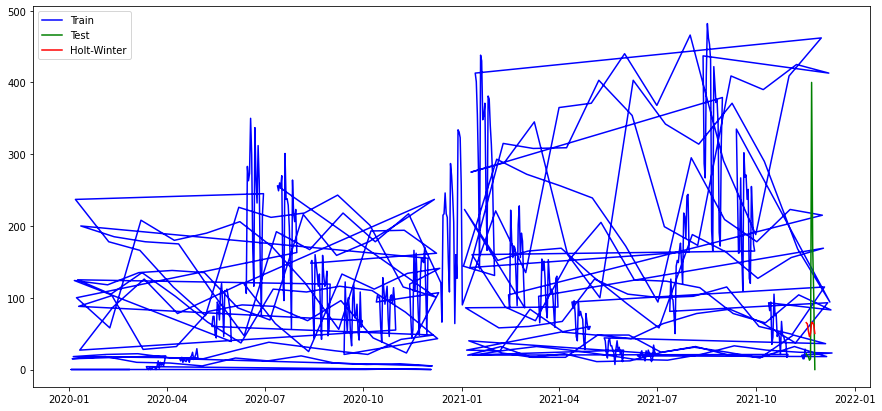

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train3['casos'],color='blue', label='Train')
plt.plot(test3['casos'],color='green',label='Test')
plt.plot(y_hat_avg3['Holt-Winter'], color='red', label='Holt-Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
train4=PUE[0:622]
test4=PUE[622:]

In [ ]:
y_hat_avg4=test4.copy()
fitl4=ExponentialSmoothing(np.array(train['casos']), seasonal_periods=15, trend='add', seasonal='add').fit()
y_hat_avg4['Holt-Winter']=fitl4.forecast(len(test4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


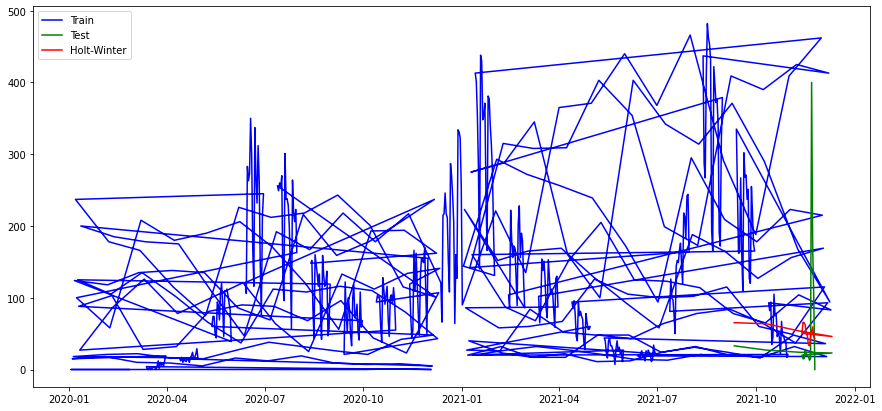

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train4['casos'],color='blue', label='Train')
plt.plot(test4['casos'],color='green',label='Test')
plt.plot(y_hat_avg4['Holt-Winter'], color='red', label='Holt-Winter')
plt.legend(loc='best')
plt.show()

Los formatos de fechas entre el conjunto de entrenamiento y prueba y los del dataframe original no cuadran y por eso la predicción sale muy desviada